In [53]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, log_loss
import matplotlib.pyplot as plt
import numpy as np

In [9]:
X, y = fetch_openml('Fashion-MNIST', version = 1, return_X_y = True)

In [35]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [26]:
X = X / 255.0

In [46]:
X_train, X_val, y_train, y_val = train_test_split(X.values, y.values, test_size = 0.2, shuffle = True, random_state = 42)

In [28]:
X_train.shape

(56000, 784)

In [31]:
model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter = 5)

In [47]:
model.fit(X_train[:1000], y_train[:1000])

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=5)

In [48]:
y_pred = model.predict(X_val[:100])
y_pred_prob = model.predict_proba(X_val[:100])
accuracy = accuracy_score(y_val[:100], y_pred)
lg_loss = log_loss(y_val[:100].astype(float), y_pred_prob)
cm = confusion_matrix(y_val[:100], y_pred)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

In [64]:
print(f'Accuracy Score: {accuracy}')
print(f'Logarithmic Loss: {lg_loss}')

Accuracy Score: 0.73
Logarithmic Loss: 0.6900875743483723


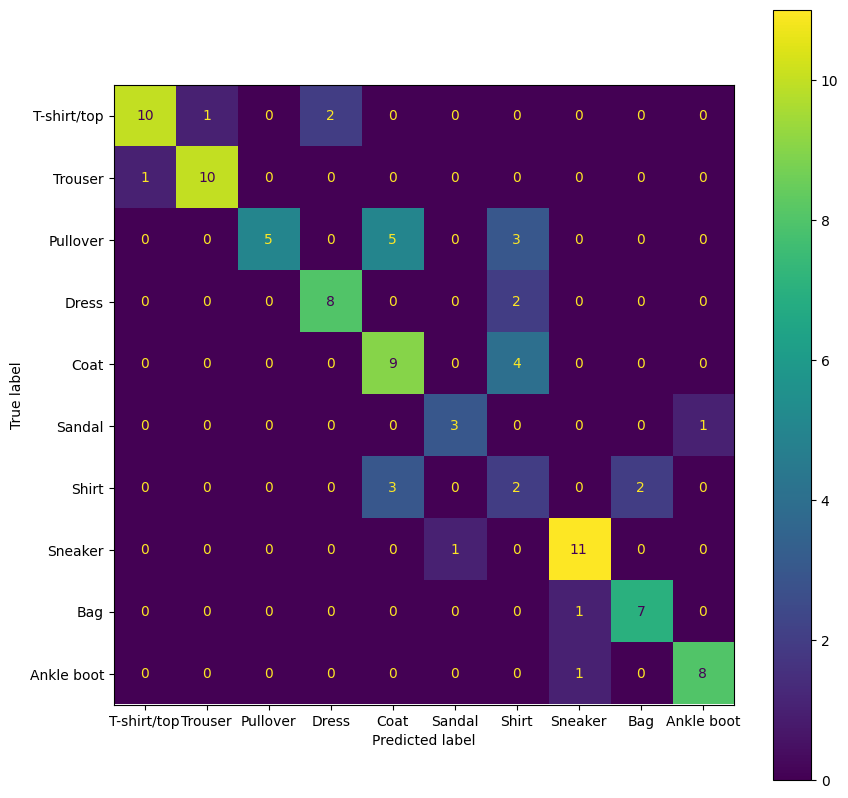

In [63]:
plt.figure(figsize=(10, 10))
display.plot(ax=plt.gca())
plt.show()